# Code for Section 2.2 Risk Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

/Users/galamboslajos/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Download and preprocess data

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary', '^GSPC': 'S&P 500'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


The number of daily observations is 6493.


# Compute and plot return series

In [12]:
H = 1
equity_returns = (data.values[H:] - data.values[0:-H]) / data.iloc[0:-H]
equity_returns_df = pd.DataFrame(100 * equity_returns, columns=data.columns)

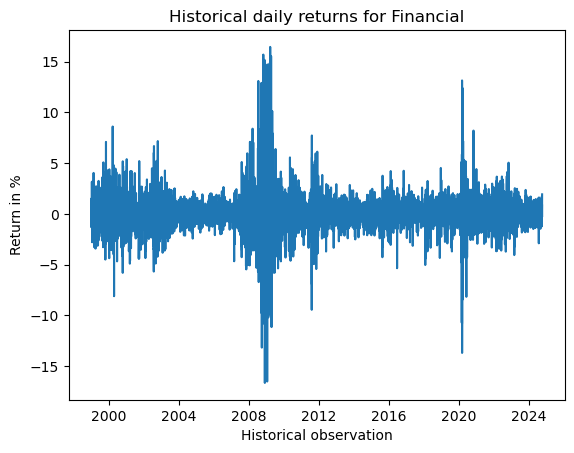

In [14]:
index = 2  # can be freely specified to something else
index_name = equity_returns_df.columns[index]
plt.plot(equity_returns_df.index, equity_returns_df[index_name].values)
plt.ylabel('Return in %')
plt.xlabel('Historical observation')
plt.title(f'Historical daily returns for {index_name}')
plt.show()

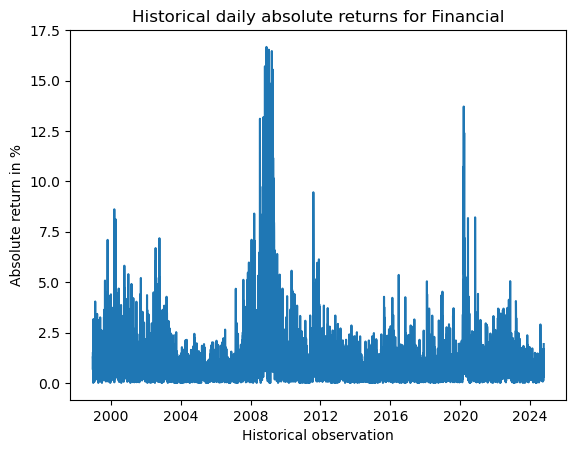

In [15]:
plt.plot(equity_returns_df.index, np.abs(equity_returns_df[index_name].values))
plt.ylabel('Absolute return in %')
plt.xlabel('Historical observation')
plt.title(f'Historical daily absolute returns for {index_name}')
plt.show()

# Lagged regression plots

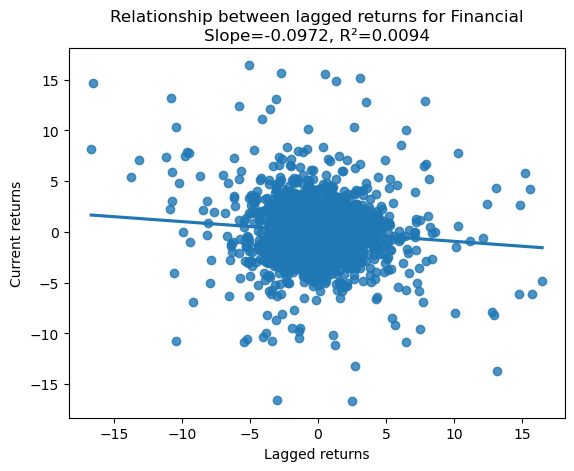

Slope: -0.097159
R-squared: 0.009439
Slope: -0.097159
R-squared: 0.009439
P-value: 4.345551e-15
Std error: 0.012356


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = equity_returns_df[index_name].values[0:-1]
y = equity_returns_df[index_name].values[1:]

# regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# plot
sns.regplot(x=x, y=y, ci=None)
plt.title(f'Relationship between lagged returns for {index_name}\n'
          f'Slope={slope:.4f}, R²={r_value**2:.4f}')
plt.xlabel("Lagged returns")
plt.ylabel("Current returns")
plt.show()

print(f"Slope: {slope:.6f}")
print(f"R-squared: {r_value**2:.6f}")

from scipy.stats import linregress

x = equity_returns_df[index_name].values[0:-1]
y = equity_returns_df[index_name].values[1:]

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope: {slope:.6f}")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.6e}")
print(f"Std error: {std_err:.6f}")



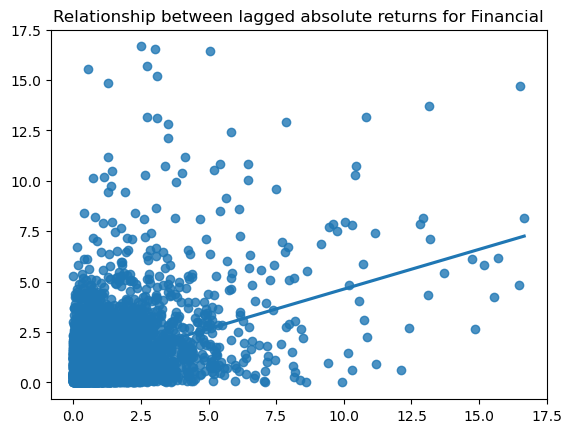

Slope: 0.394228
R-squared: 0.155410
P-value: 2.530626e-240
Std error: 0.011409


In [19]:
sns.regplot(
    x=np.abs(equity_returns_df[index_name].values[0:-1]), y=np.abs(equity_returns_df[index_name].values[1:]), ci=None)
plt.title(f'Relationship between lagged absolute returns for {index_name}')
plt.show()

from scipy.stats import linregress
import numpy as np

x_abs = np.abs(equity_returns_df[index_name].values[0:-1])
y_abs = np.abs(equity_returns_df[index_name].values[1:])

slope, intercept, r_value, p_value, std_err = linregress(x_abs, y_abs)

print(f"Slope: {slope:.6f}")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.6e}")
print(f"Std error: {std_err:.6f}")


In [8]:
# pcrm-book - Next generation investment analysis.
# Copyright (C) 2025 Anton Vorobets.

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.